# User Profile  -  High value Customer Analysis

By having the **transaction data(consumption characteristics)** and **coustomer profile** we are target to find the pattern of our **High value customer**.

- Technology Roadmap：
<div>
<img src="roadmap.png" width="500"/>
</div>


# Part 1: Data preprocess

## 1.1 Dealing with missing value:  We searching for null/0 value.
   * **customer membership**
- We regard customer records with id 0 as customers with no membership. 
- Remove customer member record without age and membership start date (only one record of missing value)
- Remove the customer with member ID but has no membership information when doing member customer value analysis(only one record member ID: 5000)

   * **transaction record**
- Regarding the transaction with sales amount 0 as giveaways promotion.
- Removing transaction records with no instore/online information when doing instore or online analytics. 

##  1.2 Dealing with outliers
- Dealing with outliers:  Apply boxplots to find the outliers. 
- There seems to be no extreme outlier with no meaning in our dataset.(There are only 3 transaction with large perchase  )

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math

import warnings
warnings.filterwarnings('ignore')

In [4]:
customer_cl = pd.read_csv ('customer_clustering.csv')
customer_cl.head()

,customer_id,Frequency,Monetary,recency,Age,membership,gender,home_store,count_instore,count_online,average_amont,higest_purchase,lowest_purchase
0,1,8,29.20,1,68,27,M,3,2,6,3.65,6.2,2.5
1,2,21,90.35,4,68,27,M,3,9,12,4.30,12.0,2.0
2,3,31,188.90,6,68,27,M,3,17,14,6.09,23.0,0.8
3,4,9,28.75,4,68,27,M,3,4,5,3.19,6.0,0.8
4,5,6,23.50,1,68,27,M,3,2,4,3.92,7.5,2.0


In [5]:
# non check
customer_cl.isna().sum()

customer_id        0
Frequency          0
Monetary           0
recency            0
Age                0
membership         0
gender             0
home_store         0
count_instore      0
count_online       0
average_amont      0
higest_purchase    0
lowest_purchase    0
dtype: int64

In [6]:
# zero check
for column_name in customer_cl.columns:
    column = customer_cl[column_name]
    count = (column == 0).sum()
    print('Count of zeros in column ', column_name, ' is : ', count)

Count of zeros in column  customer_id  is :  0
Count of zeros in column  Frequency  is :  0
Count of zeros in column  Monetary  is :  0
Count of zeros in column  recency  is :  0
Count of zeros in column  Age  is :  0
Count of zeros in column  membership  is :  28
Count of zeros in column  gender  is :  0
Count of zeros in column  home_store  is :  0
Count of zeros in column  count_instore  is :  36
Count of zeros in column  count_online  is :  52
Count of zeros in column  average_amont  is :  0
Count of zeros in column  higest_purchase  is :  0
Count of zeros in column  lowest_purchase  is :  11


<AxesSubplot:xlabel='Monetary'>

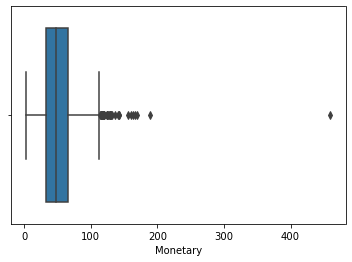

In [7]:
sns.boxplot(data = customer_cl, x = 'Monetary')

# Part 2:  Seprate member coustomers by value
## 2.1 method 1: Tagging using Clustering (Unisupervised classification)
-To depart customer into different value

In [8]:
rfm = ['recency','Frequency','Monetary']
RFM= customer_cl[rfm]
RFM

,recency,Frequency,Monetary
0,1,8,29.20
1,4,21,90.35
2,6,31,188.90
3,4,9,28.75
4,1,6,23.50
...,...,...,...
2241,5,12,66.00
2242,3,9,39.75
2243,1,12,58.10
2244,4,21,90.85


Text(0.5, 0, 'Recency')

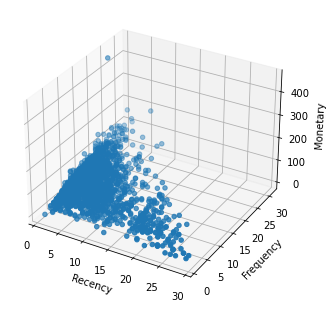

In [9]:
from mpl_toolkits.mplot3d import Axes3D
x = RFM['recency']
y = RFM['Frequency']
z = RFM['Monetary']

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x,y,z)

ax.set_zlabel('Monetary')
ax.set_ylabel('Frequency')
ax.set_xlabel('Recency')

In [10]:
# remove the "outlier"
customer_cl.iloc[2055,:]
customer_r= customer_cl.drop(labels=None,axis=0, index=2055, columns=None, inplace=False)

In [11]:
rfm = ['recency','Frequency','Monetary']
RFM_r= customer_r[rfm]

(array([166., 643., 699., 440., 188.,  70.,  29.,   4.,   5.,   1.]),
 array([  2.45 ,  21.095,  39.74 ,  58.385,  77.03 ,  95.675, 114.32 ,
        132.965, 151.61 , 170.255, 188.9  ]),
 <BarContainer object of 10 artists>)

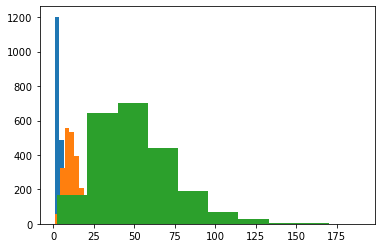

In [23]:
# visualize the distribution of the data
plt.hist(RFM_r['recency'])
plt.hist(RFM_r['Frequency'])
plt.hist(RFM_r['Monetary'])

In [12]:
RFM_log = pd.DataFrame()
RFM_log['Recency'] = RFM_r['recency'].apply(np.log1p)
RFM_log['Frequency'] = RFM_r['Frequency'].apply(np.log1p)
RFM_log['Monetary'] = RFM_r['Monetary']
RFM_log.head()

,Recency,Frequency,Monetary
0,0.693147,2.197225,29.20
1,1.609438,3.091042,90.35
2,1.945910,3.465736,188.90
3,1.609438,2.302585,28.75
4,0.693147,1.945910,23.50


(array([166., 643., 699., 440., 188.,  70.,  29.,   4.,   5.,   1.]),
 array([  2.45 ,  21.095,  39.74 ,  58.385,  77.03 ,  95.675, 114.32 ,
        132.965, 151.61 , 170.255, 188.9  ]),
 <BarContainer object of 10 artists>)

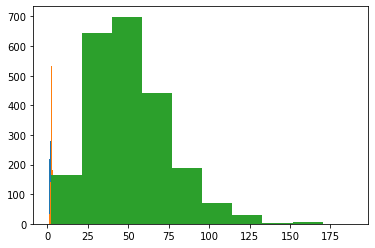

In [12]:
plt.hist(RFM_log['Recency'])
plt.hist(RFM_log['Frequency'])
plt.hist(RFM_log['Monetary'])

(array([545., 438., 220., 205., 281., 240., 104.,  54., 112.,  46.]),
 array([0.69314718, 0.9639522 , 1.23475722, 1.50556224, 1.77636726,
        2.04717228, 2.3179773 , 2.58878232, 2.85958734, 3.13039236,
        3.40119738]),
 <BarContainer object of 10 artists>)

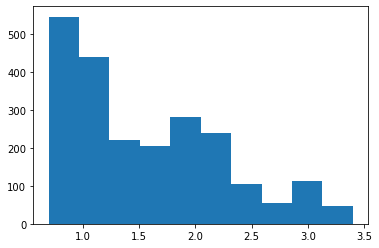

In [13]:
plt.hist(RFM_log['Recency'])

(array([  7.,  18.,  34., 182., 142., 554., 534., 556., 183.,  35.]),
 array([0.69314718, 0.97040605, 1.24766493, 1.5249238 , 1.80218267,
        2.07944154, 2.35670041, 2.63395929, 2.91121816, 3.18847703,
        3.4657359 ]),
 <BarContainer object of 10 artists>)

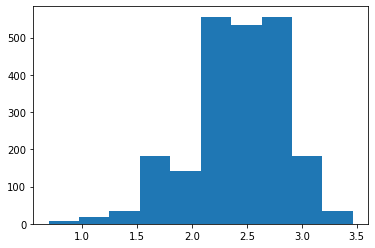

In [14]:
plt.hist(RFM_log['Frequency'])

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(RFM_log)
RFMLog_scal = scaler.transform(RFM_log)
RFMLog_scal

array([[-1.16943763, -0.49226465, -0.89622776],
       [ 0.11825642,  1.6141508 ,  1.63734553],
       [ 0.59111212,  2.49717192,  5.72047958],
       ...,
       [-1.16943763,  0.37433377,  0.30116011],
       [ 0.11825642,  1.6141508 ,  1.65806158],
       [-0.59962394, -1.08452467, -0.91487221]])

###  2.1.1 K-Means Clustering

In [16]:
from sklearn.cluster import KMeans

In [17]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(RFMLog_scal)
    distortions.append(kmeanModel.inertia_)

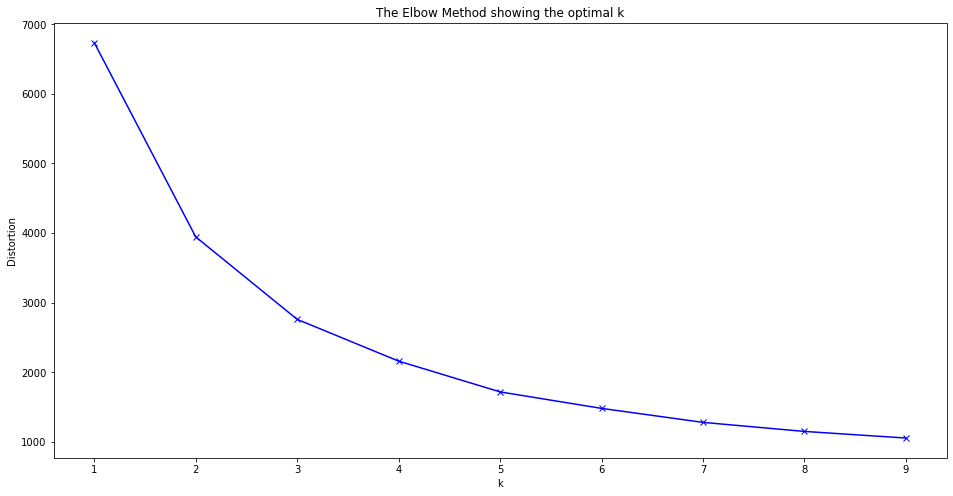

In [18]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [19]:
# log transformation data remove 'outlier' with n_clusters=3
kmeans = KMeans(n_clusters=3)
kmeans.fit(RFMLog_scal)

cls_predict = kmeans.predict(RFMLog_scal)
print("Predicted Labels:", cls_predict)
print("Performance Score:", kmeans.score(RFMLog_scal))
print("Cluster Centers: \n", kmeans.cluster_centers_)  

Predicted Labels: [0 2 2 ... 0 2 0]
Performance Score: -2759.67522665717
Cluster Centers: 
 [[-0.6603898  -0.32892335 -0.46018342]
 [ 1.25027517 -0.83639603 -0.74927526]
 [-0.19491326  0.97699772  1.05705435]]


In [20]:
# log transformation data remove 'outlier' with n_clusters=5
kmeans = KMeans(n_clusters=5)
kmeans.fit(RFMLog_scal)

cls_predict = kmeans.predict(RFMLog_scal)
print("Predicted Labels:", cls_predict)
print("Performance Score:", kmeans.score(RFMLog_scal))
print("Cluster Centers: \n", kmeans.cluster_centers_)  

Predicted Labels: [3 4 4 ... 1 4 3]
Performance Score: -1717.6027167266584
Cluster Centers: 
 [[ 0.72461752  0.22934358  0.02757445]
 [-0.80784717  0.29451745  0.11601447]
 [ 1.5614153  -1.3299206  -1.07535886]
 [-0.62814584 -0.9750392  -0.92685189]
 [-0.32056485  1.30844735  1.61969912]]


In [21]:
x_log = RFM_log['Recency']
y_log = RFM_log['Frequency']
z = RFM_log['Monetary']

Text(0.5, 0, 'Recency')

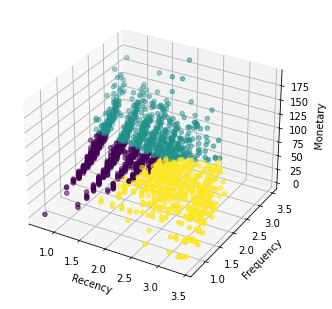

In [150]:
# S3: Visualize our results:

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x_log,y_log,z,c = cls_predict)

ax.set_zlabel('Monetary')
ax.set_ylabel('Frequency')
ax.set_xlabel('Recency')

In [174]:
## data with five cluster tag
RFM_log['Cluster5'] = cls_predict

In [175]:
RFM_log.head()

,Recency,Frequency,Monetary,Cluster5
0,0.693147,2.197225,29.20,2
1,1.609438,3.091042,90.35,4
2,1.945910,3.465736,188.90,4
3,1.609438,2.302585,28.75,2
4,0.693147,1.945910,23.50,2


Text(0.5, 0, 'Recency')

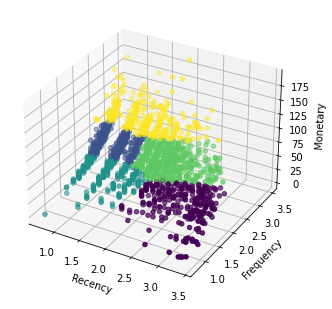

In [168]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x_log,y_log,z,c = cls_predict)

ax.set_zlabel('Monetary')
ax.set_ylabel('Frequency')
ax.set_xlabel('Recency')

Text(0.5, 0, 'Recency')

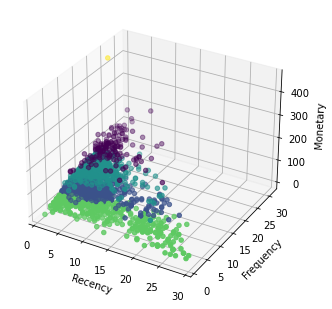

In [78]:
# S3: Visualize our results:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x,y,z,c = cls_predict)

ax.set_zlabel('Monetary')
ax.set_ylabel('Frequency')
ax.set_xlabel('Recency')

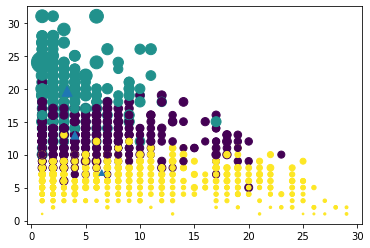

In [47]:
plt.scatter(RFM['recency'],RFM['Frequency'],RFM['Monetary'],c = cls_predict)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], marker='^')

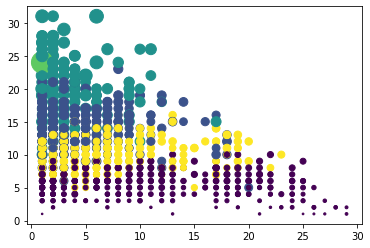

In [83]:
plt.scatter(RFM['recency'],RFM['Frequency'],RFM['Monetary'],c = cls_predict)

### 2.1.2 DBSCAN

In [171]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(RFMLog_scal)
print(clusters)

[ 0  1 -1 ...  0  1  1]


In [57]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=4)
clusters = dbscan.fit_predict(RFM_scaled)
print(clusters)

[ 0  0 -1 ...  0  0  0]


In [66]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
clusters = dbscan.fit_predict(RFM_scaled)
print(clusters)

[ 0  0 -1 ...  0  0  0]


Text(0.5, 0, 'Recency')

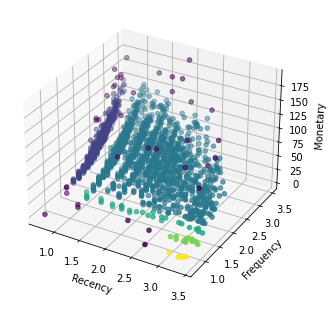

In [173]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x_log,y_log,z,c = clusters)

ax.set_zlabel('Monetary')
ax.set_ylabel('Frequency')
ax.set_xlabel('Recency')

## 2.2 method 2: Tagging by seperate data manualy

In [13]:
# since only 1 month of data was included, we drop the recency and only condcider the $ and fre
import statistics
mm = statistics.median(RFM_r['Monetary'])
fm = statistics.median(RFM_r['Frequency'])
mm,fm

(47.1, 10)

In [14]:
# create a list of our conditions
conditions = [
    (RFM_r['Monetary'] >= mm) & (RFM_r['Frequency'] >= fm),
    (RFM_r['Monetary'] >= mm) & (RFM_r['Frequency'] < fm),
    (RFM_r['Monetary'] < mm) & (RFM_r['Frequency'] >= fm),
    (RFM_r['Monetary'] < mm) & (RFM_r['Frequency'] < fm),
    ]

# create a list of the values we want to assign for each condition
values = ['4', '3', '2', '1']

# create a new column and use np.select to assign values to it using our lists as arguments
customer_r['cust_level'] = np.select(conditions, values)
customer_r.head()

,customer_id,Frequency,Monetary,recency,Age,membership,gender,home_store,count_instore,count_online,average_amont,higest_purchase,lowest_purchase,cust_level
0,1,8,29.20,1,68,27,M,3,2,6,3.65,6.2,2.5,1
1,2,21,90.35,4,68,27,M,3,9,12,4.30,12.0,2.0,4
2,3,31,188.90,6,68,27,M,3,17,14,6.09,23.0,0.8,4
3,4,9,28.75,4,68,27,M,3,4,5,3.19,6.0,0.8,1
4,5,6,23.50,1,68,27,M,3,2,4,3.92,7.5,2.0,1


# 3 Part 3: Supervised Classification
## 3.0 data split and data scale

In [15]:
#data preprocess
#1 remove RFM
df_cus = customer_r.drop(columns=['Monetary', 'Frequency','recency'])

#2 one hot encoder
from sklearn.preprocessing import OneHotEncoder
pf = pd.get_dummies(df_cus['gender'])
df_cus = pd.concat([df_cus,pf],axis = 1)
cus = df_cus.drop(['gender','customer_id'],axis = 1, inplace = False)
cus.head()

,Age,membership,home_store,count_instore,count_online,average_amont,higest_purchase,lowest_purchase,cust_level,F,M,N
0,68,27,3,2,6,3.65,6.2,2.5,1,0,1,0
1,68,27,3,9,12,4.30,12.0,2.0,4,0,1,0
2,68,27,3,17,14,6.09,23.0,0.8,4,0,1,0
3,68,27,3,4,5,3.19,6.0,0.8,1,0,1,0
4,68,27,3,2,4,3.92,7.5,2.0,1,0,1,0


In [16]:
# Choose predictors to construct attribute matrix (X) and target (Y) accordingly.
X = cus.drop(['cust_level'],axis = 1, inplace = False)
y = cus.cust_level
print(X.shape,y.shape)

(2245, 11) (2245,)


In [17]:
# Data Splitting, check sample
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 24)

In [18]:
#Data scale
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scal = scaler.transform(X_train)
X_test_scal = scaler.transform(X_test)

## 3.1 LogisticRegression (multi-classificaiton) 97.18/ 94.21

In [36]:
#scaled
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(multi_class='multinomial',solver='lbfgs',class_weight='balanced',max_iter=1000)
logreg.fit(X_train_scal, y_train)
print(logreg.coef_)
print(logreg.intercept_)
print("Accuracy is:", logreg.score(X_test_scal, y_test))

[[-3.77848121e-01  3.17871044e-01 -1.95340128e-01 -7.08647709e+00
  -7.46648262e+00 -1.59022607e+00 -6.09861343e-01 -4.11236911e-02
   9.77066848e-02  1.92934593e-02 -1.32711575e-01]
 [ 7.70312623e-02 -1.14329405e-01  2.14748672e-01  8.14237645e-01
   6.43057766e-01 -2.78451008e+00  1.08325543e-01 -2.04277984e-02
  -8.11239605e-03 -5.71708869e-03  1.54948682e-02]
 [ 3.65485850e-01 -1.41560479e-01 -1.11529133e-01 -5.16506595e-01
  -2.89028590e-01  2.58722198e+00  2.15985442e-01  1.98672376e-01
  -6.75124163e-02 -9.59402695e-03  8.76348319e-02]
 [-6.46689914e-02 -6.19811597e-02  9.21205890e-02  6.78874604e+00
   7.11245344e+00  1.78751417e+00  2.85550357e-01 -1.37120887e-01
  -2.20818724e-02 -3.98234367e-03  2.95818747e-02]]
[-2.59110018  1.68234037 -1.24060844  2.14936825]
Accuracy is: 0.9421364985163204


In [38]:
#unscaled
logreg.fit(X_train, y_train)
print(logreg.coef_)
print(logreg.intercept_)
print("Accuracy is:", logreg.score(X_test, y_test))

[[-2.94241148e-02  5.58661620e-02 -1.32992988e-01 -3.87881853e+00
  -4.00993287e+00 -2.60958268e+00 -1.27623589e-01 -1.42829886e-01
   2.40734962e-01  1.07732988e-01 -2.60407828e-01]
 [ 3.95758142e-03 -1.76527359e-02  1.51259406e-01  6.66721139e-01
   6.22491139e-01 -4.09336601e+00  4.03166332e-03 -7.48653995e-02
   5.27126810e-01  5.40457084e-01  4.50774738e-01]
 [ 3.33683872e-02 -2.99964328e-02 -2.92565995e-02 -2.40995167e-01
  -1.59716890e-01  3.70665321e+00  4.88821693e-02  4.05531175e-01
  -4.71328996e-01 -2.93143438e-01  9.07493949e-02]
 [-7.90185378e-03 -8.21699338e-03  1.09901819e-02  3.45309256e+00
   3.54715862e+00  2.99629547e+00  7.47097563e-02 -1.87835890e-01
  -2.96532776e-01 -3.55046633e-01 -2.81116306e-01]]
[ 52.87441027  13.2609254  -17.94872542 -48.18661025]
Accuracy is: 0.9718100890207715


In [86]:
# rank the feature importances
coef_c1 = pd.DataFrame({'var' : pd.Series(X_test.columns),
                        'coef_abs' : abs(pd.Series(logreg.coef_[0].flatten()))
                        })
coef_c1 = coef_c1.sort_values(by = 'coef_abs',ascending=False)
print(coef_c1)

                var  coef_abs
4      count_online  4.758766
3     count_instore  4.612687
5     average_amont  3.158429
10                N  0.504732
7   lowest_purchase  0.290983
2        home_store  0.206678
6   higest_purchase  0.132317
9                 M  0.123539
8                 F  0.065691
1        membership  0.063739
0               Age  0.037021


In [77]:
coef_c2 = pd.DataFrame({'var' : pd.Series(X_test.columns),
                        'coef_abs' : abs(pd.Series(logreg.coef_[1].flatten()))
                        })
coef_c2 = coef_c2.sort_values(by = 'coef_abs',ascending=False)
print(coef_c2)

                var  coef_abs
5     average_amont  4.354464
3     count_instore  0.797045
4      count_online  0.754439
2        home_store  0.173595
8                 F  0.148074
9                 M  0.120788
10                N  0.083814
7   lowest_purchase  0.057212
1        membership  0.029285
6   higest_purchase  0.023681
0               Age  0.011980


In [78]:
coef_c3 = pd.DataFrame({'var' : pd.Series(X_test.columns),
                        'coef_abs' : abs(pd.Series(logreg.coef_[2].flatten()))
                        })
coef_c3 = coef_c3.sort_values(by = 'coef_abs',ascending=False)
print(coef_c3)

                var  coef_abs
5     average_amont  3.958931
7   lowest_purchase  0.451307
10                N  0.361875
9                 M  0.214711
3     count_instore  0.193576
4      count_online  0.105176
6   higest_purchase  0.075169
0               Age  0.024659
1        membership  0.021014
2        home_store  0.011026
8                 F  0.004824


In [79]:
coef_c4 = pd.DataFrame({'var' : pd.Series(X_test.columns),
                        'coef_abs' : abs(pd.Series(logreg.coef_[3].flatten()))
                        })
coef_c4 = coef_c4.sort_values(by = 'coef_abs',ascending=False)
print(coef_c4)

                var  coef_abs
4      count_online  4.109504
3     count_instore  4.009218
5     average_amont  3.553961
10                N  0.226671
7   lowest_purchase  0.103111
8                 F  0.087207
6   higest_purchase  0.080829
2        home_store  0.044109
9                 M  0.029616
1        membership  0.013441
0               Age  0.000382


### Interpret the result of Logistic Regressionis

- Accuracy of Logistic Regressionis: 0.9748
- The top 3 important variables are buying frequency(for both online and instore)and amount. 
- If we take a close look beside that the gender and home store also influence the value of customer. 

## 3.2 K-Nearest Neighbor 79.97/81.60

In [40]:
#unscaled
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier()
# define a list of parameters
param_knn = {'n_neighbors': range(3, 26, 2)}  

#apply grid search
grid_knn = GridSearchCV( knn , param_knn, cv = 5)
grid_knn.fit(X_train, y_train)

# the best hyperparameter chosen:
print(grid_knn.best_params_)

# When k=15 (best case), the validation score of through CV is:
print(grid_knn.best_score_)

print("Accuracy for KNN is:", grid_knn.score(X_test, y_test))

{'n_neighbors': 15}
0.8319563239308462
Accuracy for KNN is: 0.7997032640949555


In [41]:
#scaled
grid_knn = GridSearchCV( knn , param_knn, cv = 5)
grid_knn.fit(X_train_scal, y_train)

# the best hyperparameter chosen:
print(grid_knn.best_params_)

# When k=15 (best case), the validation score of through CV is:
print(grid_knn.best_score_)

print("Accuracy for KNN is:", grid_knn.score(X_test_scal, y_test))

{'n_neighbors': 15}
0.8281366899201295
Accuracy for KNN is: 0.8160237388724035


## 3.3 Decision Tree Classifier 94.21

### 3.3.1 default tree 94.21

In [42]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state = 0, criterion = 'entropy')
dt.fit(X_train, y_train)
print(dt.score(X_train, y_train))
print("Accuracy for Decision tree is:", dt.score(X_test, y_test))

1.0
Accuracy for Decision tree is: 0.9421364985163204


In [107]:
# feature_importances_
fi = pd.DataFrame({'var' : pd.Series(X_test.columns),
                   'feature_importances' : pd.Series(dt.feature_importances_, copy=False)
                  })
fi = fi.sort_values(by = 'feature_importances',ascending=False)
print(fi)

                var  feature_importances
3     count_instore             0.415960
4      count_online             0.378212
5     average_amont             0.144381
6   higest_purchase             0.039148
1        membership             0.006105
2        home_store             0.006036
0               Age             0.005178
7   lowest_purchase             0.004980
8                 F             0.000000
9                 M             0.000000
10                N             0.000000


<BarContainer object of 11 artists>

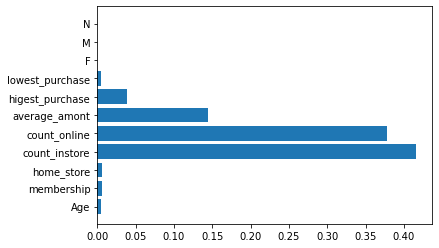

In [108]:
my_x = X_test.columns
my_y = dt.feature_importances_

plt.barh(my_x, my_y)

#### Interpret the result of default Decision Tree

- Accuracy of Logistic Regressionis: 0.942
- The top 3 important variables are buying frequency(for both online and instore)and amount. 
- If we take a close look the membership and home store also influence the value of customer.

### 3.3.2 Tree with GridSearch  CV   89.61

In [65]:
# GridSearch + CV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# estimator
opt_tree = DecisionTreeClassifier(random_state = 0) # for all hyperparameters, apply the same setting

# hyperparameters (multiple)
dt_params = {'max_depth':  range(1,10)         ,
             'min_samples_split':   range(2,30),
             'max_leaf_nodes':    range(2,30)   }

# GridsearchCV
grid_tree = GridSearchCV(opt_tree, dt_params,cv = 5)

grid_tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': range(1, 10),
                         'max_leaf_nodes': range(2, 30),
                         'min_samples_split': range(2, 30)})

In [122]:
print(grid_tree.best_params_)
print(grid_tree.best_score_)
print("Accuracy for grid_tree is:", grid_tree.score(X_test, y_test))

{'max_depth': 8, 'max_leaf_nodes': 29, 'min_samples_split': 8}
0.9146860782529572
Accuracy for grid_tree is: 0.8961424332344213


In [111]:
from sklearn import tree
# grid_tree.best_estimator_
print(tree.export_text(grid_tree.best_estimator_))

|--- feature_4 <= 5.50
|   |--- feature_3 <= 5.50
|   |   |--- feature_6 <= 16.50
|   |   |   |--- class: 1
|   |   |--- feature_6 >  16.50
|   |   |   |--- class: 3
|   |--- feature_3 >  5.50
|   |   |--- feature_3 <= 7.50
|   |   |   |--- feature_4 <= 2.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_4 >  2.50
|   |   |   |   |--- feature_5 <= 4.28
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- feature_5 >  4.28
|   |   |   |   |   |--- class: 4
|   |   |--- feature_3 >  7.50
|   |   |   |--- class: 4
|--- feature_4 >  5.50
|   |--- feature_3 <= 3.50
|   |   |--- feature_4 <= 7.50
|   |   |   |--- class: 1
|   |   |--- feature_4 >  7.50
|   |   |   |--- class: 4
|   |--- feature_3 >  3.50
|   |   |--- feature_5 <= 3.81
|   |   |   |--- class: 4
|   |   |--- feature_5 >  3.81
|   |   |   |--- class: 4



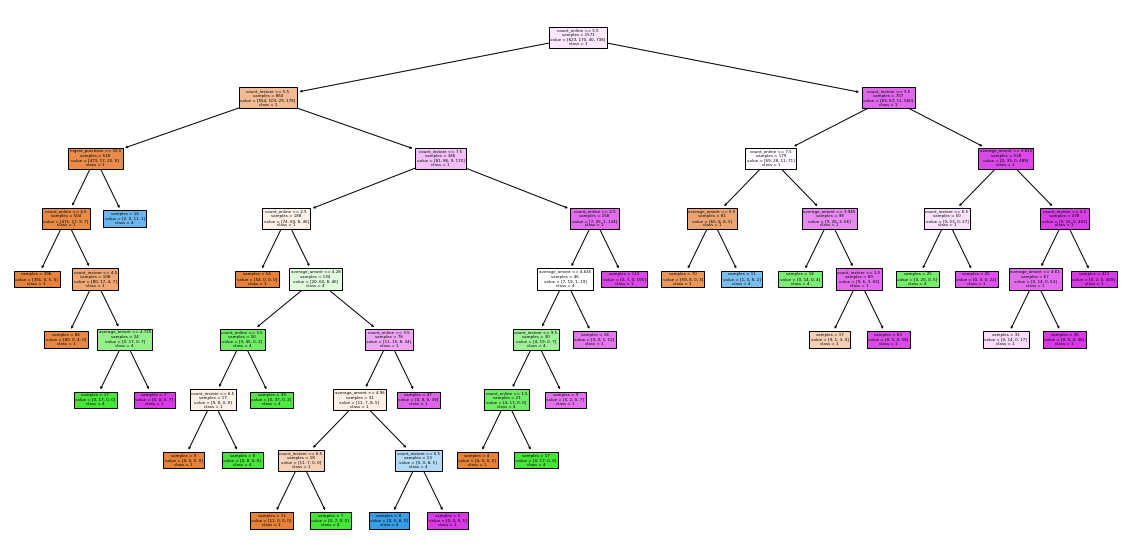

In [118]:
# Plot the decision tree
from sklearn import tree
fig = plt.figure(figsize=(20,10)) # set a proper figure size (in case that the figure is too small to read or ratio is not proper)

tree.plot_tree(grid_tree.best_estimator_, 
               feature_names = X_test.columns, # specify variable names 
               class_names = cus.cust_level, # specify class (Y) names
               filled = True, impurity = False) # whether to color the boxes, whether to report gini index
             #   fontsize = 12) # set fontsize to read
plt.show()

### 3.3.3 Decision Tree - Post Pruning 92.87


In [123]:
# decision tree model
clf = DecisionTreeClassifier(random_state=0)

# model training - obtain the path of post-pruning
path = clf.cost_complexity_pruning_path(X_train, y_train)

effective_alphas, impurities = path.ccp_alphas, path.impurities

In [124]:
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeClassifier(random_state=0)

dt_params = {'ccp_alpha': effective_alphas}

dt_grid = GridSearchCV(dt, dt_params, cv = 5)
dt_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'ccp_alpha': array([0.        , 0.00041984, 0.00058349, 0.00060471, 0.0006243 ,
       0.00063164, 0.00063654, 0.00077799, 0.00084459, 0.00084872,
       0.00084872, 0.00090785, 0.00095481, 0.00095481, 0.00095481,
       0.00101846, 0.00101846, 0.00102695, 0.00108018, 0.00116698,
       0.00118214, 0.00124758, 0.00148525, 0.001527...
       0.00159134, 0.00198034, 0.0020157 , 0.00221041, 0.00222879,
       0.00227444, 0.00230366, 0.00254615, 0.00281702, 0.00286442,
       0.00294222, 0.00366464, 0.00391715, 0.00403848, 0.00448274,
       0.00462335, 0.00524867, 0.00571787, 0.00631233, 0.00665994,
       0.00681784, 0.00735837, 0.00760904, 0.00763929, 0.00874998,
       0.01048362, 0.01108161, 0.01377218, 0.02289413, 0.02480348,
       0.03740169, 0.09695146, 0.15837701])})

In [125]:
print(dt_grid.best_params_)
print(dt_grid.best_score_)
print("Accuracy for grid_tree is:", dt_grid.score(X_test, y_test))

{'ccp_alpha': 0.001980338071999434}
0.9369770498432919
Accuracy for grid_tree is: 0.9287833827893175


## 3.4 SVM with Kernel Functions 98.66/98.81

In [46]:
from sklearn.svm import SVC

svm_clf = SVC(kernel = 'rbf', C = 1, random_state = 0)

svm_clf.fit(X_train, y_train)
print("The accuracy for vanilla SVM is : ",svm_clf.score(X_test, y_test))

svm_clf.fit(X_train_scal, y_train)
print("The accuracy for scaled vanilla SVM is : ",svm_clf.score(X_test_scal, y_test))

The accuracy for vanilla SVM is :  0.8516320474777448
The accuracy for scaled vanilla SVM is :  0.913946587537092


In [47]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define Function
svc_clf = SVC(random_state = 0, kernel = 'rbf')

#define a list of parameters
param_svc_kernel = {'C':  [0.001, 0.01, 0.1, 1, 10, 100, 10000]     ,
                    'gamma':  [0.0001, 0.001,0.001,0.1,1,10]    } 

#apply grid search
grid_svc = GridSearchCV(svc_clf, param_svc_kernel, cv = 5, n_jobs=2)

grid_svc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=0), n_jobs=2,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 10000],
                         'gamma': [0.0001, 0.001, 0.001, 0.1, 1, 10]})

In [48]:
grid_svc.best_params_

{'C': 10000, 'gamma': 0.0001}

In [49]:
print("Accuracy for SVM is:", grid_svc.score(X_test, y_test))

Accuracy for SVM is: 0.9866468842729971


In [50]:
grid_svc.fit(X_train_scal, y_train)
print("Accuracy for SVM_scaled is:", grid_svc.score(X_test_scal, y_test))

Accuracy for SVM_scaled is: 0.9881305637982196


## 3.5 Naive Bayes 75.96
We set the perfomace of nb as baseline

In [52]:
from sklearn.naive_bayes import GaussianNB

g_nb = GaussianNB()
g_nb.fit(X_train, y_train)
print("Accuracy for NB is:",g_nb.score(X_test, y_test))

Accuracy for NB is: 0.7596439169139466


##  3.6 Voting Classifier 85.76/97.33

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

log_clf = LogisticRegression(random_state=42)
grid_svc = GridSearchCV(svc_clf, param_svc_kernel, cv = 5, n_jobs=2)
nbg_clf = GaussianNB()

In [54]:
from sklearn.ensemble import VotingClassifier

# define voting classifier
voting_clf = VotingClassifier(
    estimators=[('lr1', log_clf), ('grid_svc', grid_svc), ('nbg', nbg_clf)],
    voting='hard')

# train the model
voting_clf.fit(X_train_scal, y_train)

# Performance Measure
print("Test score for voting classifier is:", voting_clf.score(X_test_scal, y_test))

Test score for voting classifier is: 0.973293768545994


In [55]:
for clf in (log_clf, nbg_clf, grid_svc, voting_clf):
    clf.fit(X_train_scal, y_train)
    print(clf.__class__.__name__, clf.score(X_test_scal, y_test))

LogisticRegression 0.9718100890207715
GaussianNB 0.7596439169139466
GridSearchCV 0.9881305637982196
VotingClassifier 0.973293768545994


## 3.7 Random Forest 86.05

In [161]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=200, max_samples=100, random_state=42)
rnd_clf.fit(X_train, y_train)

print("Test score for Random Forest is:", rnd_clf.score(X_test, y_test))

Test score for voting classifier is: 0.8605341246290801


## 3.8 Neural Network with CV 97.8/98.57

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

scaler = StandardScaler()
scaler.fit(X)
X_scale = scaler.transform(X)

X_in = X_scale.astype(float)
Y_in = y
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y_in)
encoded_Y = encoder.transform(Y_in)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)
dummy_y

array([[1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.]], dtype=float32)

In [ ]:
shape(X_in)

In [35]:
# define baseline model
def baseline_model():
   # create model
    model = Sequential()
    model.add(Dense(3, input_dim=11, activation='relu'))
    model.add(Dense(3, activation='relu'))
    model.add(Dense(4, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [36]:
estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=5, verbose=1)
kfold = KFold(n_splits=10, shuffle=True)
results = cross_val_score(estimator, X_in, dummy_y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Train on 2020 samples
Epoch 1/200
2020/2020 [==============================] - 1s 388us/sample - loss: 1.1408 - accuracy: 0.4832
Epoch 2/200
2020/2020 [==============================] - 0s 156us/sample - loss: 1.0311 - accuracy: 0.5485
Epoch 3/200
2020/2020 [==============================] - 0s 180us/sample - loss: 0.9291 - accuracy: 0.6748
Epoch 4/200
2020/2020 [==============================] - 0s 165us/sample - loss: 0.8074 - accuracy: 0.7589
Epoch 5/200
2020/2020 [==============================] - 0s 169us/sample - loss: 0.6638 - accuracy: 0.8144
Epoch 6/200
2020/2020 [==============================] - 0s 142us/sample - loss: 0.5323 - accuracy: 0.8386
Epoch 7/200
2020/2020 [==============================] - 0s 161us/sample - loss: 0.4334 - accuracy: 0.8470
Epoch 8/200
2020/2020 [==============================] - 0s 143us/sample - loss: 0.3619 - accuracy: 0.8554
Epoch 9/200
2020/2020 [==============================] - 0s 143us/sample - loss: 0.3089 - accuracy: 0.8668
Epoch 10/200
20

2020/2020 [==============================] - 0s 142us/sample - loss: 0.0213 - accuracy: 0.9936
Epoch 77/200
2020/2020 [==============================] - 0s 139us/sample - loss: 0.0206 - accuracy: 0.9941
Epoch 78/200
2020/2020 [==============================] - 0s 148us/sample - loss: 0.0215 - accuracy: 0.9931
Epoch 79/200
2020/2020 [==============================] - 0s 138us/sample - loss: 0.0198 - accuracy: 0.9950
Epoch 80/200
2020/2020 [==============================] - 0s 141us/sample - loss: 0.0209 - accuracy: 0.9936
Epoch 81/200
2020/2020 [==============================] - 0s 140us/sample - loss: 0.0195 - accuracy: 0.9946
Epoch 82/200
2020/2020 [==============================] - 0s 139us/sample - loss: 0.0199 - accuracy: 0.9941
Epoch 83/200
2020/2020 [==============================] - 0s 139us/sample - loss: 0.0191 - accuracy: 0.9955
Epoch 84/200
2020/2020 [==============================] - 0s 139us/sample - loss: 0.0196 - accuracy: 0.9946
Epoch 85/200
2020/2020 [=================

2020/2020 [==============================] - 0s 165us/sample - loss: 0.0129 - accuracy: 0.9960
Epoch 152/200
2020/2020 [==============================] - 0s 151us/sample - loss: 0.0134 - accuracy: 0.9955
Epoch 153/200
2020/2020 [==============================] - 0s 143us/sample - loss: 0.0137 - accuracy: 0.9931
Epoch 154/200
2020/2020 [==============================] - 0s 146us/sample - loss: 0.0118 - accuracy: 0.9975
Epoch 155/200
2020/2020 [==============================] - 0s 159us/sample - loss: 0.0124 - accuracy: 0.9955
Epoch 156/200
2020/2020 [==============================] - 0s 158us/sample - loss: 0.0130 - accuracy: 0.9950
Epoch 157/200
2020/2020 [==============================] - 0s 164us/sample - loss: 0.0114 - accuracy: 0.9970
Epoch 158/200
2020/2020 [==============================] - 0s 160us/sample - loss: 0.0122 - accuracy: 0.9960
Epoch 159/200
2020/2020 [==============================] - 0s 155us/sample - loss: 0.0132 - accuracy: 0.9955
Epoch 160/200
2020/2020 [========

Train on 2020 samples
Epoch 1/200
2020/2020 [==============================] - 1s 343us/sample - loss: 1.2204 - accuracy: 0.4802
Epoch 2/200
2020/2020 [==============================] - 0s 140us/sample - loss: 0.9419 - accuracy: 0.6782
Epoch 3/200
2020/2020 [==============================] - 0s 140us/sample - loss: 0.7437 - accuracy: 0.7554
Epoch 4/200
2020/2020 [==============================] - 0s 140us/sample - loss: 0.5470 - accuracy: 0.7985
Epoch 5/200
2020/2020 [==============================] - 0s 140us/sample - loss: 0.4204 - accuracy: 0.8470
Epoch 6/200
2020/2020 [==============================] - 0s 139us/sample - loss: 0.3481 - accuracy: 0.8738
Epoch 7/200
2020/2020 [==============================] - 0s 139us/sample - loss: 0.3012 - accuracy: 0.8906
Epoch 8/200
2020/2020 [==============================] - 0s 139us/sample - loss: 0.2663 - accuracy: 0.9030
Epoch 9/200
2020/2020 [==============================] - 0s 139us/sample - loss: 0.2376 - accuracy: 0.9129
Epoch 10/200
20

2020/2020 [==============================] - 0s 151us/sample - loss: 0.0174 - accuracy: 0.9965
Epoch 77/200
2020/2020 [==============================] - 0s 149us/sample - loss: 0.0180 - accuracy: 0.9946
Epoch 78/200
2020/2020 [==============================] - 0s 146us/sample - loss: 0.0172 - accuracy: 0.9970
Epoch 79/200
2020/2020 [==============================] - 0s 155us/sample - loss: 0.0164 - accuracy: 0.9946
Epoch 80/200
2020/2020 [==============================] - 0s 166us/sample - loss: 0.0168 - accuracy: 0.9960
Epoch 81/200
2020/2020 [==============================] - 0s 161us/sample - loss: 0.0156 - accuracy: 0.9975
Epoch 82/200
2020/2020 [==============================] - 0s 158us/sample - loss: 0.0166 - accuracy: 0.9965
Epoch 83/200
2020/2020 [==============================] - 0s 142us/sample - loss: 0.0169 - accuracy: 0.9960
Epoch 84/200
2020/2020 [==============================] - 0s 140us/sample - loss: 0.0156 - accuracy: 0.9980
Epoch 85/200
2020/2020 [=================

2020/2020 [==============================] - 0s 144us/sample - loss: 0.0110 - accuracy: 0.9975
Epoch 152/200
2020/2020 [==============================] - 0s 141us/sample - loss: 0.0092 - accuracy: 0.9985
Epoch 153/200
2020/2020 [==============================] - 0s 141us/sample - loss: 0.0109 - accuracy: 0.9965
Epoch 154/200
2020/2020 [==============================] - 0s 141us/sample - loss: 0.0111 - accuracy: 0.9960
Epoch 155/200
2020/2020 [==============================] - 0s 142us/sample - loss: 0.0109 - accuracy: 0.9955
Epoch 156/200
2020/2020 [==============================] - 0s 140us/sample - loss: 0.0100 - accuracy: 0.9980
Epoch 157/200
2020/2020 [==============================] - 0s 141us/sample - loss: 0.0104 - accuracy: 0.9965
Epoch 158/200
2020/2020 [==============================] - 0s 138us/sample - loss: 0.0106 - accuracy: 0.9965
Epoch 159/200
2020/2020 [==============================] - 0s 141us/sample - loss: 0.0107 - accuracy: 0.9955
Epoch 160/200
2020/2020 [========

Train on 2020 samples
Epoch 1/200
2020/2020 [==============================] - 1s 288us/sample - loss: 1.2189 - accuracy: 0.3891
Epoch 2/200
2020/2020 [==============================] - 0s 146us/sample - loss: 0.9252 - accuracy: 0.6342
Epoch 3/200
2020/2020 [==============================] - 0s 145us/sample - loss: 0.6396 - accuracy: 0.8010
Epoch 4/200
2020/2020 [==============================] - 0s 146us/sample - loss: 0.4829 - accuracy: 0.8322
Epoch 5/200
2020/2020 [==============================] - 0s 146us/sample - loss: 0.3974 - accuracy: 0.8460
Epoch 6/200
2020/2020 [==============================] - 0s 146us/sample - loss: 0.3399 - accuracy: 0.8658
Epoch 7/200
2020/2020 [==============================] - 0s 146us/sample - loss: 0.2940 - accuracy: 0.8832
Epoch 8/200
2020/2020 [==============================] - 0s 147us/sample - loss: 0.2571 - accuracy: 0.9005
Epoch 9/200
2020/2020 [==============================] - 0s 146us/sample - loss: 0.2308 - accuracy: 0.9129
Epoch 10/200
20

2020/2020 [==============================] - 0s 150us/sample - loss: 0.0397 - accuracy: 0.9881
Epoch 77/200
2020/2020 [==============================] - 0s 148us/sample - loss: 0.0403 - accuracy: 0.9871
Epoch 78/200
2020/2020 [==============================] - 0s 149us/sample - loss: 0.0386 - accuracy: 0.9871
Epoch 79/200
2020/2020 [==============================] - 0s 148us/sample - loss: 0.0384 - accuracy: 0.9871
Epoch 80/200
2020/2020 [==============================] - 0s 149us/sample - loss: 0.0377 - accuracy: 0.9866
Epoch 81/200
2020/2020 [==============================] - 0s 149us/sample - loss: 0.0379 - accuracy: 0.9876
Epoch 82/200
2020/2020 [==============================] - 0s 151us/sample - loss: 0.0379 - accuracy: 0.9871
Epoch 83/200
2020/2020 [==============================] - 0s 149us/sample - loss: 0.0378 - accuracy: 0.9856
Epoch 84/200
2020/2020 [==============================] - 0s 150us/sample - loss: 0.0367 - accuracy: 0.9871
Epoch 85/200
2020/2020 [=================

2020/2020 [==============================] - 0s 151us/sample - loss: 0.0269 - accuracy: 0.9891
Epoch 152/200
2020/2020 [==============================] - 0s 149us/sample - loss: 0.0267 - accuracy: 0.9896
Epoch 153/200
2020/2020 [==============================] - 0s 150us/sample - loss: 0.0276 - accuracy: 0.9871
Epoch 154/200
2020/2020 [==============================] - 0s 149us/sample - loss: 0.0263 - accuracy: 0.9906
Epoch 155/200
2020/2020 [==============================] - 0s 148us/sample - loss: 0.0271 - accuracy: 0.9886
Epoch 156/200
2020/2020 [==============================] - 0s 149us/sample - loss: 0.0262 - accuracy: 0.9896
Epoch 157/200
2020/2020 [==============================] - 0s 149us/sample - loss: 0.0271 - accuracy: 0.9886
Epoch 158/200
2020/2020 [==============================] - 0s 150us/sample - loss: 0.0257 - accuracy: 0.9886
Epoch 159/200
2020/2020 [==============================] - 0s 150us/sample - loss: 0.0264 - accuracy: 0.9881
Epoch 160/200
2020/2020 [========

Train on 2020 samples
Epoch 1/200
2020/2020 [==============================] - 1s 288us/sample - loss: 1.4064 - accuracy: 0.3941
Epoch 2/200
2020/2020 [==============================] - 0s 147us/sample - loss: 1.1274 - accuracy: 0.5718
Epoch 3/200
2020/2020 [==============================] - 0s 147us/sample - loss: 0.9108 - accuracy: 0.7470
Epoch 4/200
2020/2020 [==============================] - 0s 147us/sample - loss: 0.7571 - accuracy: 0.8183
Epoch 5/200
2020/2020 [==============================] - 0s 147us/sample - loss: 0.6427 - accuracy: 0.8460
Epoch 6/200
2020/2020 [==============================] - 0s 147us/sample - loss: 0.5582 - accuracy: 0.8584
Epoch 7/200
2020/2020 [==============================] - 0s 147us/sample - loss: 0.4945 - accuracy: 0.8629
Epoch 8/200
2020/2020 [==============================] - 0s 148us/sample - loss: 0.4445 - accuracy: 0.8683
Epoch 9/200
2020/2020 [==============================] - 0s 147us/sample - loss: 0.4045 - accuracy: 0.8743
Epoch 10/200
20

2020/2020 [==============================] - 0s 149us/sample - loss: 0.0220 - accuracy: 0.9911
Epoch 77/200
2020/2020 [==============================] - 0s 154us/sample - loss: 0.0207 - accuracy: 0.9936
Epoch 78/200
2020/2020 [==============================] - 0s 149us/sample - loss: 0.0207 - accuracy: 0.9916
Epoch 79/200
2020/2020 [==============================] - 0s 147us/sample - loss: 0.0204 - accuracy: 0.9936
Epoch 80/200
2020/2020 [==============================] - 0s 149us/sample - loss: 0.0204 - accuracy: 0.9921
Epoch 81/200
2020/2020 [==============================] - 0s 148us/sample - loss: 0.0203 - accuracy: 0.9931
Epoch 82/200
2020/2020 [==============================] - 0s 148us/sample - loss: 0.0195 - accuracy: 0.9946
Epoch 83/200
2020/2020 [==============================] - 0s 147us/sample - loss: 0.0196 - accuracy: 0.9941
Epoch 84/200
2020/2020 [==============================] - 0s 148us/sample - loss: 0.0200 - accuracy: 0.9926
Epoch 85/200
2020/2020 [=================

2020/2020 [==============================] - 0s 157us/sample - loss: 0.0146 - accuracy: 0.9950
Epoch 152/200
2020/2020 [==============================] - 0s 149us/sample - loss: 0.0137 - accuracy: 0.9946
Epoch 153/200
2020/2020 [==============================] - 0s 148us/sample - loss: 0.0144 - accuracy: 0.9941
Epoch 154/200
2020/2020 [==============================] - 0s 147us/sample - loss: 0.0135 - accuracy: 0.9950
Epoch 155/200
2020/2020 [==============================] - 0s 148us/sample - loss: 0.0120 - accuracy: 0.9950
Epoch 156/200
2020/2020 [==============================] - 0s 147us/sample - loss: 0.0134 - accuracy: 0.9960
Epoch 157/200
2020/2020 [==============================] - 0s 148us/sample - loss: 0.0139 - accuracy: 0.9946
Epoch 158/200
2020/2020 [==============================] - 0s 147us/sample - loss: 0.0135 - accuracy: 0.9965
Epoch 159/200
2020/2020 [==============================] - 0s 148us/sample - loss: 0.0121 - accuracy: 0.9965
Epoch 160/200
2020/2020 [========

Train on 2020 samples
Epoch 1/200
2020/2020 [==============================] - 1s 281us/sample - loss: 1.2070 - accuracy: 0.4431
Epoch 2/200
2020/2020 [==============================] - 0s 143us/sample - loss: 0.9699 - accuracy: 0.5238
Epoch 3/200
2020/2020 [==============================] - 0s 143us/sample - loss: 0.7888 - accuracy: 0.7470
Epoch 4/200
2020/2020 [==============================] - 0s 146us/sample - loss: 0.6362 - accuracy: 0.8381
Epoch 5/200
2020/2020 [==============================] - 0s 141us/sample - loss: 0.5344 - accuracy: 0.8614
Epoch 6/200
2020/2020 [==============================] - 0s 143us/sample - loss: 0.4625 - accuracy: 0.8678
Epoch 7/200
2020/2020 [==============================] - 0s 142us/sample - loss: 0.4106 - accuracy: 0.8713
Epoch 8/200
2020/2020 [==============================] - 0s 144us/sample - loss: 0.3701 - accuracy: 0.8713
Epoch 9/200
2020/2020 [==============================] - 0s 143us/sample - loss: 0.3376 - accuracy: 0.8733
Epoch 10/200
20

2020/2020 [==============================] - 0s 144us/sample - loss: 0.0316 - accuracy: 0.9911
Epoch 77/200
2020/2020 [==============================] - 0s 142us/sample - loss: 0.0290 - accuracy: 0.9926
Epoch 78/200
2020/2020 [==============================] - 0s 143us/sample - loss: 0.0309 - accuracy: 0.9911
Epoch 79/200
2020/2020 [==============================] - 0s 142us/sample - loss: 0.0298 - accuracy: 0.9926
Epoch 80/200
2020/2020 [==============================] - 0s 143us/sample - loss: 0.0294 - accuracy: 0.9911
Epoch 81/200
2020/2020 [==============================] - 0s 142us/sample - loss: 0.0293 - accuracy: 0.9901
Epoch 82/200
2020/2020 [==============================] - 0s 142us/sample - loss: 0.0305 - accuracy: 0.9891
Epoch 83/200
2020/2020 [==============================] - 0s 142us/sample - loss: 0.0279 - accuracy: 0.9926
Epoch 84/200
2020/2020 [==============================] - 0s 145us/sample - loss: 0.0293 - accuracy: 0.9906
Epoch 85/200
2020/2020 [=================

2020/2020 [==============================] - 0s 146us/sample - loss: 0.0220 - accuracy: 0.9906
Epoch 152/200
2020/2020 [==============================] - 0s 144us/sample - loss: 0.0207 - accuracy: 0.9936
Epoch 153/200
2020/2020 [==============================] - 0s 144us/sample - loss: 0.0208 - accuracy: 0.9901
Epoch 154/200
2020/2020 [==============================] - 0s 144us/sample - loss: 0.0212 - accuracy: 0.9926
Epoch 155/200
2020/2020 [==============================] - 0s 144us/sample - loss: 0.0221 - accuracy: 0.9921
Epoch 156/200
2020/2020 [==============================] - 0s 144us/sample - loss: 0.0199 - accuracy: 0.9916
Epoch 157/200
2020/2020 [==============================] - 0s 144us/sample - loss: 0.0205 - accuracy: 0.9926
Epoch 158/200
2020/2020 [==============================] - 0s 145us/sample - loss: 0.0200 - accuracy: 0.9926
Epoch 159/200
2020/2020 [==============================] - 0s 144us/sample - loss: 0.0212 - accuracy: 0.9911
Epoch 160/200
2020/2020 [========

Train on 2021 samples
Epoch 1/200
2021/2021 [==============================] - 1s 313us/sample - loss: 1.1860 - accuracy: 0.5878
Epoch 2/200
2021/2021 [==============================] - 0s 158us/sample - loss: 0.7874 - accuracy: 0.7536
Epoch 3/200
2021/2021 [==============================] - 0s 157us/sample - loss: 0.5615 - accuracy: 0.8154
Epoch 4/200
2021/2021 [==============================] - 0s 159us/sample - loss: 0.4435 - accuracy: 0.8387
Epoch 5/200
2021/2021 [==============================] - 0s 156us/sample - loss: 0.3683 - accuracy: 0.8540
Epoch 6/200
2021/2021 [==============================] - 0s 157us/sample - loss: 0.3133 - accuracy: 0.8803
Epoch 7/200
2021/2021 [==============================] - 0s 157us/sample - loss: 0.2703 - accuracy: 0.8991
Epoch 8/200
2021/2021 [==============================] - 0s 160us/sample - loss: 0.2352 - accuracy: 0.9124
Epoch 9/200
2021/2021 [==============================] - 0s 172us/sample - loss: 0.2033 - accuracy: 0.9228
Epoch 10/200
20

2021/2021 [==============================] - 0s 160us/sample - loss: 0.0132 - accuracy: 0.9960
Epoch 77/200
2021/2021 [==============================] - 0s 155us/sample - loss: 0.0138 - accuracy: 0.9965
Epoch 78/200
2021/2021 [==============================] - 0s 157us/sample - loss: 0.0141 - accuracy: 0.9951
Epoch 79/200
2021/2021 [==============================] - 0s 157us/sample - loss: 0.0139 - accuracy: 0.9951
Epoch 80/200
2021/2021 [==============================] - 0s 158us/sample - loss: 0.0132 - accuracy: 0.9965
Epoch 81/200
2021/2021 [==============================] - 0s 158us/sample - loss: 0.0136 - accuracy: 0.9951
Epoch 82/200
2021/2021 [==============================] - 0s 156us/sample - loss: 0.0122 - accuracy: 0.9960
Epoch 83/200
2021/2021 [==============================] - 0s 159us/sample - loss: 0.0136 - accuracy: 0.9951
Epoch 84/200
2021/2021 [==============================] - 0s 158us/sample - loss: 0.0121 - accuracy: 0.9980
Epoch 85/200
2021/2021 [=================

2021/2021 [==============================] - 0s 172us/sample - loss: 0.0085 - accuracy: 0.9975
Epoch 152/200
2021/2021 [==============================] - 0s 161us/sample - loss: 0.0090 - accuracy: 0.9965
Epoch 153/200
2021/2021 [==============================] - 0s 162us/sample - loss: 0.0086 - accuracy: 0.9970
Epoch 154/200
2021/2021 [==============================] - 0s 161us/sample - loss: 0.0102 - accuracy: 0.9951
Epoch 155/200
2021/2021 [==============================] - 0s 160us/sample - loss: 0.0101 - accuracy: 0.9960
Epoch 156/200
2021/2021 [==============================] - 0s 161us/sample - loss: 0.0093 - accuracy: 0.9965
Epoch 157/200
2021/2021 [==============================] - 0s 161us/sample - loss: 0.0089 - accuracy: 0.9975
Epoch 158/200
2021/2021 [==============================] - 0s 161us/sample - loss: 0.0083 - accuracy: 0.9970
Epoch 159/200
2021/2021 [==============================] - 0s 160us/sample - loss: 0.0084 - accuracy: 0.9975
Epoch 160/200
2021/2021 [========

Train on 2021 samples
Epoch 1/200
2021/2021 [==============================] - 1s 311us/sample - loss: 1.2654 - accuracy: 0.4993
Epoch 2/200
2021/2021 [==============================] - 0s 157us/sample - loss: 0.8642 - accuracy: 0.7536
Epoch 3/200
2021/2021 [==============================] - 0s 157us/sample - loss: 0.5704 - accuracy: 0.8362
Epoch 4/200
2021/2021 [==============================] - 0s 157us/sample - loss: 0.4410 - accuracy: 0.8525
Epoch 5/200
2021/2021 [==============================] - 0s 156us/sample - loss: 0.3733 - accuracy: 0.8714
Epoch 6/200
2021/2021 [==============================] - 0s 157us/sample - loss: 0.3292 - accuracy: 0.8852
Epoch 7/200
2021/2021 [==============================] - 0s 158us/sample - loss: 0.2968 - accuracy: 0.8941
Epoch 8/200
2021/2021 [==============================] - 0s 158us/sample - loss: 0.2723 - accuracy: 0.9005
Epoch 9/200
2021/2021 [==============================] - 0s 157us/sample - loss: 0.2512 - accuracy: 0.9114
Epoch 10/200
20

2021/2021 [==============================] - 0s 158us/sample - loss: 0.0351 - accuracy: 0.9891
Epoch 77/200
2021/2021 [==============================] - 0s 155us/sample - loss: 0.0332 - accuracy: 0.9891
Epoch 78/200
2021/2021 [==============================] - 0s 156us/sample - loss: 0.0342 - accuracy: 0.9891
Epoch 79/200
2021/2021 [==============================] - 0s 156us/sample - loss: 0.0332 - accuracy: 0.9891
Epoch 80/200
2021/2021 [==============================] - 0s 156us/sample - loss: 0.0335 - accuracy: 0.9886
Epoch 81/200
2021/2021 [==============================] - 0s 156us/sample - loss: 0.0330 - accuracy: 0.9881
Epoch 82/200
2021/2021 [==============================] - 0s 157us/sample - loss: 0.0322 - accuracy: 0.9886
Epoch 83/200
2021/2021 [==============================] - 0s 157us/sample - loss: 0.0328 - accuracy: 0.9896
Epoch 84/200
2021/2021 [==============================] - 0s 157us/sample - loss: 0.0322 - accuracy: 0.9891
Epoch 85/200
2021/2021 [=================

2021/2021 [==============================] - 0s 159us/sample - loss: 0.0248 - accuracy: 0.9886
Epoch 152/200
2021/2021 [==============================] - 0s 155us/sample - loss: 0.0249 - accuracy: 0.9891
Epoch 153/200
2021/2021 [==============================] - 0s 157us/sample - loss: 0.0253 - accuracy: 0.9896
Epoch 154/200
2021/2021 [==============================] - 0s 156us/sample - loss: 0.0245 - accuracy: 0.9906
Epoch 155/200
2021/2021 [==============================] - 0s 156us/sample - loss: 0.0259 - accuracy: 0.9891
Epoch 156/200
2021/2021 [==============================] - 0s 157us/sample - loss: 0.0242 - accuracy: 0.9901
Epoch 157/200
2021/2021 [==============================] - 0s 156us/sample - loss: 0.0247 - accuracy: 0.9906
Epoch 158/200
2021/2021 [==============================] - 0s 159us/sample - loss: 0.0244 - accuracy: 0.9891
Epoch 159/200
2021/2021 [==============================] - 0s 157us/sample - loss: 0.0242 - accuracy: 0.9911
Epoch 160/200
2021/2021 [========

Train on 2021 samples
Epoch 1/200
2021/2021 [==============================] - 1s 310us/sample - loss: 1.4165 - accuracy: 0.2979
Epoch 2/200
2021/2021 [==============================] - 0s 159us/sample - loss: 1.1730 - accuracy: 0.4666
Epoch 3/200
2021/2021 [==============================] - 0s 160us/sample - loss: 0.9265 - accuracy: 0.5997
Epoch 4/200
2021/2021 [==============================] - 0s 159us/sample - loss: 0.6956 - accuracy: 0.8501
Epoch 5/200
2021/2021 [==============================] - 0s 160us/sample - loss: 0.5910 - accuracy: 0.8619
Epoch 6/200
2021/2021 [==============================] - 0s 159us/sample - loss: 0.5196 - accuracy: 0.8649
Epoch 7/200
2021/2021 [==============================] - 0s 159us/sample - loss: 0.4645 - accuracy: 0.8659
Epoch 8/200
2021/2021 [==============================] - 0s 164us/sample - loss: 0.4207 - accuracy: 0.8659
Epoch 9/200
2021/2021 [==============================] - 0s 158us/sample - loss: 0.3839 - accuracy: 0.8664
Epoch 10/200
20

2021/2021 [==============================] - 0s 160us/sample - loss: 0.0389 - accuracy: 0.9911
Epoch 77/200
2021/2021 [==============================] - 0s 158us/sample - loss: 0.0379 - accuracy: 0.9896
Epoch 78/200
2021/2021 [==============================] - 0s 159us/sample - loss: 0.0381 - accuracy: 0.9906
Epoch 79/200
2021/2021 [==============================] - 0s 159us/sample - loss: 0.0395 - accuracy: 0.9886
Epoch 80/200
2021/2021 [==============================] - 0s 160us/sample - loss: 0.0377 - accuracy: 0.9891
Epoch 81/200
2021/2021 [==============================] - 0s 159us/sample - loss: 0.0381 - accuracy: 0.9906
Epoch 82/200
2021/2021 [==============================] - 0s 159us/sample - loss: 0.0372 - accuracy: 0.9901
Epoch 83/200
2021/2021 [==============================] - 0s 159us/sample - loss: 0.0376 - accuracy: 0.9886
Epoch 84/200
2021/2021 [==============================] - 0s 158us/sample - loss: 0.0364 - accuracy: 0.9901
Epoch 85/200
2021/2021 [=================

2021/2021 [==============================] - 0s 162us/sample - loss: 0.0300 - accuracy: 0.9921
Epoch 152/200
2021/2021 [==============================] - 0s 160us/sample - loss: 0.0315 - accuracy: 0.9886
Epoch 153/200
2021/2021 [==============================] - 0s 159us/sample - loss: 0.0297 - accuracy: 0.9901
Epoch 154/200
2021/2021 [==============================] - 0s 193us/sample - loss: 0.0294 - accuracy: 0.9906
Epoch 155/200
2021/2021 [==============================] - 0s 160us/sample - loss: 0.0295 - accuracy: 0.9901
Epoch 156/200
2021/2021 [==============================] - 617s 305ms/sample - loss: 0.0296 - accuracy: 0.9896
Epoch 157/200
2021/2021 [==============================] - 0s 228us/sample - loss: 0.0306 - accuracy: 0.9886
Epoch 158/200
2021/2021 [==============================] - 1s 283us/sample - loss: 0.0306 - accuracy: 0.9891
Epoch 159/200
2021/2021 [==============================] - 0s 168us/sample - loss: 0.0294 - accuracy: 0.9906
Epoch 160/200
2021/2021 [======

Train on 2021 samples
Epoch 1/200
2021/2021 [==============================] - 1s 421us/sample - loss: 1.1914 - accuracy: 0.5863
Epoch 2/200
2021/2021 [==============================] - 0s 167us/sample - loss: 0.9715 - accuracy: 0.6922
Epoch 3/200
2021/2021 [==============================] - 0s 165us/sample - loss: 0.8241 - accuracy: 0.7694
Epoch 4/200
2021/2021 [==============================] - 0s 156us/sample - loss: 0.7016 - accuracy: 0.8140
Epoch 5/200
2021/2021 [==============================] - 0s 157us/sample - loss: 0.6076 - accuracy: 0.8362
Epoch 6/200
2021/2021 [==============================] - 0s 157us/sample - loss: 0.5385 - accuracy: 0.8451
Epoch 7/200
2021/2021 [==============================] - 0s 156us/sample - loss: 0.4886 - accuracy: 0.8481
Epoch 8/200
2021/2021 [==============================] - 0s 156us/sample - loss: 0.4514 - accuracy: 0.8511
Epoch 9/200
2021/2021 [==============================] - 0s 154us/sample - loss: 0.4225 - accuracy: 0.8506
Epoch 10/200
20

2021/2021 [==============================] - 0s 152us/sample - loss: 0.1408 - accuracy: 0.9560
Epoch 77/200
2021/2021 [==============================] - 0s 154us/sample - loss: 0.1390 - accuracy: 0.9560
Epoch 78/200
2021/2021 [==============================] - 0s 153us/sample - loss: 0.1382 - accuracy: 0.9579
Epoch 79/200
2021/2021 [==============================] - 0s 153us/sample - loss: 0.1395 - accuracy: 0.9570
Epoch 80/200
2021/2021 [==============================] - 0s 153us/sample - loss: 0.1365 - accuracy: 0.9574
Epoch 81/200
2021/2021 [==============================] - 0s 153us/sample - loss: 0.1369 - accuracy: 0.9565
Epoch 82/200
2021/2021 [==============================] - 0s 152us/sample - loss: 0.1352 - accuracy: 0.9584
Epoch 83/200
2021/2021 [==============================] - 0s 157us/sample - loss: 0.1354 - accuracy: 0.9574
Epoch 84/200
2021/2021 [==============================] - 0s 153us/sample - loss: 0.1364 - accuracy: 0.9579
Epoch 85/200
2021/2021 [=================

2021/2021 [==============================] - 0s 155us/sample - loss: 0.1049 - accuracy: 0.9668
Epoch 152/200
2021/2021 [==============================] - 0s 160us/sample - loss: 0.1044 - accuracy: 0.9693
Epoch 153/200
2021/2021 [==============================] - 0s 160us/sample - loss: 0.1026 - accuracy: 0.9708
Epoch 154/200
2021/2021 [==============================] - 0s 153us/sample - loss: 0.1071 - accuracy: 0.9703
Epoch 155/200
2021/2021 [==============================] - 0s 153us/sample - loss: 0.1025 - accuracy: 0.9683
Epoch 156/200
2021/2021 [==============================] - 0s 160us/sample - loss: 0.1034 - accuracy: 0.9728
Epoch 157/200
2021/2021 [==============================] - 0s 154us/sample - loss: 0.1020 - accuracy: 0.9743
Epoch 158/200
2021/2021 [==============================] - 0s 153us/sample - loss: 0.1027 - accuracy: 0.9693
Epoch 159/200
2021/2021 [==============================] - 0s 154us/sample - loss: 0.1024 - accuracy: 0.9688
Epoch 160/200
2021/2021 [========

Train on 2021 samples
Epoch 1/200
2021/2021 [==============================] - 1s 304us/sample - loss: 1.0823 - accuracy: 0.6136
Epoch 2/200
2021/2021 [==============================] - 0s 145us/sample - loss: 0.8302 - accuracy: 0.7877
Epoch 3/200
2021/2021 [==============================] - 0s 145us/sample - loss: 0.6904 - accuracy: 0.8308
Epoch 4/200
2021/2021 [==============================] - 0s 145us/sample - loss: 0.5942 - accuracy: 0.8446
Epoch 5/200
2021/2021 [==============================] - 0s 144us/sample - loss: 0.5244 - accuracy: 0.8565
Epoch 6/200
2021/2021 [==============================] - 0s 144us/sample - loss: 0.4680 - accuracy: 0.8624
Epoch 7/200
2021/2021 [==============================] - 0s 144us/sample - loss: 0.4165 - accuracy: 0.8644
Epoch 8/200
2021/2021 [==============================] - 0s 145us/sample - loss: 0.3598 - accuracy: 0.8679
Epoch 9/200
2021/2021 [==============================] - 0s 145us/sample - loss: 0.3096 - accuracy: 0.8709
Epoch 10/200
20

2021/2021 [==============================] - 0s 183us/sample - loss: 0.0355 - accuracy: 0.9921
Epoch 77/200
2021/2021 [==============================] - 0s 159us/sample - loss: 0.0353 - accuracy: 0.9911
Epoch 78/200
2021/2021 [==============================] - 0s 150us/sample - loss: 0.0340 - accuracy: 0.9896
Epoch 79/200
2021/2021 [==============================] - 0s 149us/sample - loss: 0.0341 - accuracy: 0.9926
Epoch 80/200
2021/2021 [==============================] - 0s 159us/sample - loss: 0.0345 - accuracy: 0.9911
Epoch 81/200
2021/2021 [==============================] - 0s 154us/sample - loss: 0.0331 - accuracy: 0.9931
Epoch 82/200
2021/2021 [==============================] - 0s 147us/sample - loss: 0.0330 - accuracy: 0.9906
Epoch 83/200
2021/2021 [==============================] - 0s 145us/sample - loss: 0.0323 - accuracy: 0.9931
Epoch 84/200
2021/2021 [==============================] - 0s 165us/sample - loss: 0.0329 - accuracy: 0.9931
Epoch 85/200
2021/2021 [=================

2021/2021 [==============================] - 0s 146us/sample - loss: 0.0200 - accuracy: 0.9946
Epoch 152/200
2021/2021 [==============================] - 0s 151us/sample - loss: 0.0193 - accuracy: 0.9955
Epoch 153/200
2021/2021 [==============================] - 0s 168us/sample - loss: 0.0193 - accuracy: 0.9941
Epoch 154/200
2021/2021 [==============================] - 0s 164us/sample - loss: 0.0202 - accuracy: 0.9941
Epoch 155/200
2021/2021 [==============================] - 0s 217us/sample - loss: 0.0190 - accuracy: 0.9941
Epoch 156/200
2021/2021 [==============================] - 0s 150us/sample - loss: 0.0185 - accuracy: 0.9951
Epoch 157/200
2021/2021 [==============================] - 0s 146us/sample - loss: 0.0198 - accuracy: 0.9965
Epoch 158/200
2021/2021 [==============================] - 0s 146us/sample - loss: 0.0193 - accuracy: 0.9951
Epoch 159/200
2021/2021 [==============================] - 0s 146us/sample - loss: 0.0195 - accuracy: 0.9951
Epoch 160/200
2021/2021 [========

Baseline: 98.57% (0.56%)
